<a href="https://colab.research.google.com/github/tabang205/Khai_Pha_Du_Lieu/blob/main/De3_KPDL_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("elikplim/car-evaluation-data-set")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'car-evaluation-data-set' dataset.
Path to dataset files: /kaggle/input/car-evaluation-data-set


In [ ]:
import numpy as np
import pandas as pd

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/car-evaluation-data-set/car_evaluation.csv


In [ ]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

In [ ]:
df = pd.read_csv('/kaggle/input/car-evaluation-data-set/car_evaluation.csv')
df.head()

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [ ]:
df.columns = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
df

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc
...,...,...,...,...,...,...,...
1722,low,low,5more,more,med,med,good
1723,low,low,5more,more,med,high,vgood
1724,low,low,5more,more,big,low,unacc
1725,low,low,5more,more,big,med,good


In [ ]:
df.isnull().sum()

,0
buying,0
maint,0
doors,0
persons,0
lug_boot,0
safety,0
class,0


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.dtypes

,0
buying,object
maint,object
doors,object
persons,object
lug_boot,object
safety,object
class,object


In [ ]:
for col in df.columns:
    print(f"Column '{col}': {df[col].unique()}")

Column 'buying': [3 2 1 0]
Column 'maint': [3 2 1 0]
Column 'doors': [2 3 4 5]
Column 'persons': [2 4 5]
Column 'lug_boot': [0 1 2]
Column 'safety': [1 2 0]
Column 'class': [0 1 2]


In [ ]:
# 1. Định nghĩa các quy tắc ánh xạ
mapping_rules = {
    "buying":   {"low": 0, "med": 1, "high": 2, "vhigh": 3},
    "maint":    {"low": 0, "med": 1, "high": 2, "vhigh": 3},
    "doors":    {"2": 2, "3": 3, "4": 4, "5more": 5},
    "persons":  {"2": 2, "4": 4, "more": 5},
    "lug_boot": {"small": 0, "med": 1, "big": 2},
    "safety":   {"low": 0, "med": 1, "high": 2},
    "class":    {"unacc": 0, "acc": 1, "good": 2, "vgood": 2} # 0: Không mua, 1: Cân nhắc, 2: Mua
}

# 2. Áp dụng ánh xạ
df.replace(mapping_rules, inplace=True)

# 3. Kiểm tra kết quả
print(df.head())

   buying  maint  doors  persons  lug_boot  safety  class
0       3      3      2        2         0       1      0
1       3      3      2        2         0       2      0
2       3      3      2        2         1       0      0
3       3      3      2        2         1       1      0
4       3      3      2        2         1       2      0


In [ ]:
df.describe()

,buying,maint,doors,persons,lug_boot,safety,class
count,1727.000000,1727.000000,1727.000000,1727.000000,1727.000000,1727.000000,1727.000000
mean,1.499131,1.499131,3.500869,3.667632,1.000579,1.000579,0.377533
std,1.118098,1.118098,1.118098,1.247296,0.816615,0.816615,0.624828
min,0.000000,0.000000,2.000000,2.000000,0.000000,0.000000,0.000000
25%,0.500000,0.500000,3.000000,2.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,4.000000,4.000000,1.000000,1.000000,0.000000
75%,2.000000,2.000000,4.500000,5.000000,2.000000,2.000000,1.000000
max,3.000000,3.000000,5.000000,5.000000,2.000000,2.000000,2.000000


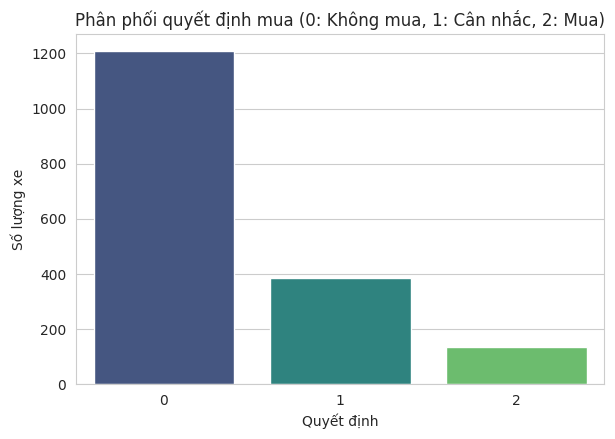

In [ ]:
# Cài đặt giao diện cho đẹp
sns.set_style("whitegrid")
plt.figure(figsize=(15, 10))

# --- Biểu đồ 1: Phân phối Nhãn (Bạn đang có bao nhiêu xe ở mỗi nhóm?) ---
plt.subplot(2, 2, 1) # Vị trí số 1
# Vẽ biểu đồ cột đếm số lượng
sns.countplot(x='class', data=df, palette='viridis')
plt.title('Phân phối quyết định mua (0: Không mua, 1: Cân nhắc, 2: Mua)')
plt.xlabel('Quyết định')
plt.ylabel('Số lượng xe')
plt.show()

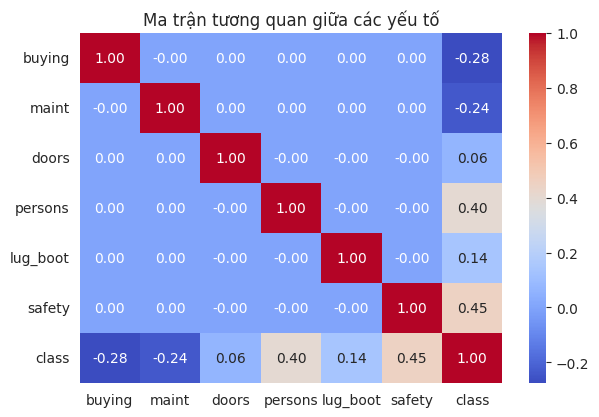

In [ ]:
# --- Biểu đồ 2: Ma trận tương quan (Heatmap) ---
# Biểu đồ này cực quan trọng để xem yếu tố nào ảnh hưởng mạnh nhất đến 'class'
plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 2) # Vị trí số 2
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Ma trận tương quan giữa các yếu tố')
plt.show()

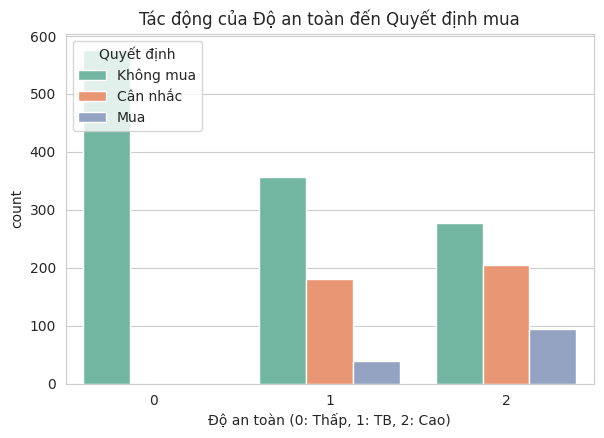

In [ ]:
# --- Biểu đồ 3: Quan hệ giữa An toàn (Safety) và Quyết định mua (Class) ---
plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 3)
sns.countplot(x='safety', hue='class', data=df, palette='Set2')
plt.title('Tác động của Độ an toàn đến Quyết định mua')
plt.xlabel('Độ an toàn (0: Thấp, 1: TB, 2: Cao)')
plt.legend(title='Quyết định', loc='upper left', labels=['Không mua', 'Cân nhắc', 'Mua'])
plt.show()

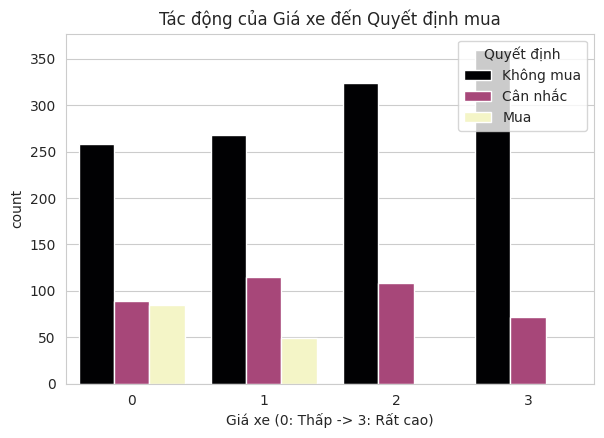

In [ ]:
# --- Biểu đồ 4: Quan hệ giữa Giá mua (Buying) và Quyết định mua ---
plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 4)
sns.countplot(x='buying', hue='class', data=df, palette='magma')
plt.title('Tác động của Giá xe đến Quyết định mua')
plt.xlabel('Giá xe (0: Thấp -> 3: Rất cao)')
plt.legend(title='Quyết định', loc='upper right', labels=['Không mua', 'Cân nhắc', 'Mua'])
plt.show()

Ở Biểu đồ 1 sẽ thấy cột số 0 (Không mua) cao vống lên. Điều này chứng minh dữ liệu bị Mất cân bằng (Imbalanced). Kết luận cần cẩn trọng khi đánh giá độ chính xác (Accuracy).

Ở Biểu đồ 2 (Heatmap) ở dòng cuối cùng (class). Ô nào có màu đậm nhất (hoặc chỉ số dương cao nhất)? Đó là yếu tố quan trọng nhất. Thường safety (an toàn) và persons (số chỗ) sẽ có tương quan dương (màu đỏ) với việc mua xe.

Ở Biểu đồ sẽ thấy ở cột Safety = 0 (An toàn thấp), gần như 100% là Không mua (Màu của nhóm 0). Insight an toàn là yếu tố tiên quyết.

In [ ]:
# 1. Tách X (Input) và y (Output)
X = df.drop('class', axis=1)
y = df['class']

# 2. Chia tập Train (75%) và Test (25%)
# random_state=42: Giữ cố định kết quả chia để lần sau chạy lại y hệt
# stratify=y: Đảm bảo tỷ lệ các nhãn 0, 1, 2 đều nhau ở 2 tập
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

print(f"Số lượng mẫu huấn luyện: {X_train.shape[0]}")
print(f"Số lượng mẫu kiểm tra: {X_test.shape[0]}")

# 3. Mô hình C4.5 (Dùng DecisionTree với criterion='entropy')
# Lưu ý: max_depth giúp tránh overfitting (học vẹt), có thể thử thay đổi số này
c45_model = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=42)
c45_model.fit(X_train, y_train)

# 4. Mô hình Random Forest
rf_model = RandomForestClassifier(n_estimators=100, criterion='entropy', random_state=42)
rf_model.fit(X_train, y_train)

# Dự đoán thử trên tập Test
y_pred_c45 = c45_model.predict(X_test)
y_pred_rf = rf_model.predict(X_test)

print("--- BÁO CÁO CHI TIẾT MÔ HÌNH C4.5 (DECISION TREE) ---")
report_c45 = classification_report(y_test, y_pred_c45, target_names=["Không mua", "Cân nhắc", "Mua"])
print(report_c45)

print("--- BÁO CÁO CHI TIẾT MÔ HÌNH RANDOM FOREST ---")
report = classification_report(y_test, y_pred_rf, target_names=["Không mua", "Cân nhắc", "Mua"])
print(report)

Số lượng mẫu huấn luyện: 1295
Số lượng mẫu kiểm tra: 432
--- BÁO CÁO CHI TIẾT MÔ HÌNH C4.5 (DECISION TREE) ---
              precision    recall  f1-score   support

   Không mua       0.96      0.92      0.94       302
    Cân nhắc       0.73      0.80      0.76        96
         Mua       0.78      0.82      0.80        34

    accuracy                           0.89       432
   macro avg       0.82      0.85      0.83       432
weighted avg       0.90      0.89      0.89       432

--- BÁO CÁO CHI TIẾT MÔ HÌNH RANDOM FOREST ---
              precision    recall  f1-score   support

   Không mua       0.99      0.98      0.99       302
    Cân nhắc       0.95      0.95      0.95        96
         Mua       0.94      1.00      0.97        34

    accuracy                           0.98       432
   macro avg       0.96      0.98      0.97       432
weighted avg       0.98      0.98      0.98       432



<Figure size 1000x500 with 0 Axes>

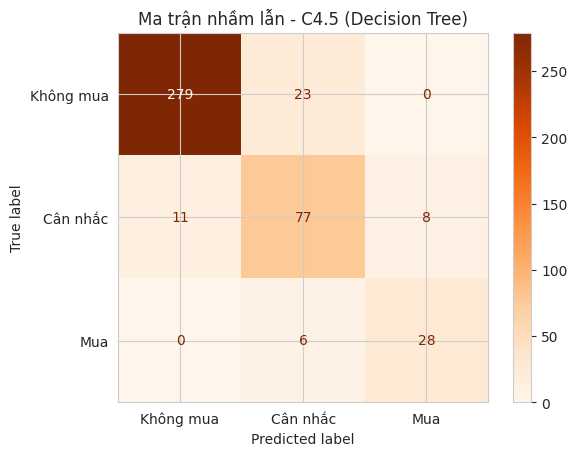

In [ ]:
# --- VẼ MA TRẬN NHẦM LẪN (CONFUSION MATRIX) CHO C4.5 ---
plt.figure(figsize=(10, 5))
cm_c45 = confusion_matrix(y_test, y_pred_c45)
disp_c45 = ConfusionMatrixDisplay(confusion_matrix=cm_c45, display_labels=["Không mua", "Cân nhắc", "Mua"])

# Đổi màu sang 'Greens' hoặc 'Oranges' để khác với biểu đồ của Random Forest lúc nãy
disp_c45.plot(cmap='Oranges')
plt.title("Ma trận nhầm lẫn - C4.5 (Decision Tree)")
plt.show()

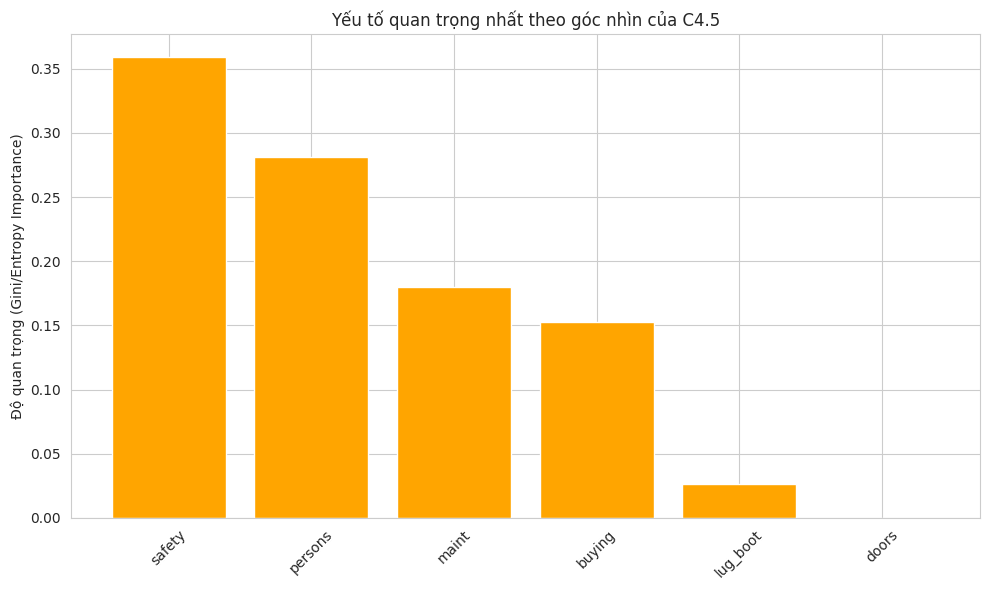

In [ ]:
# --- VẼ FEATURE IMPORTANCE CHO C4.5 ---
importances_c45 = c45_model.feature_importances_
feature_names = X.columns
indices_c45 = np.argsort(importances_c45)[::-1]

plt.figure(figsize=(10, 6))
plt.title("Yếu tố quan trọng nhất theo góc nhìn của C4.5")
plt.bar(range(X.shape[1]), importances_c45[indices_c45], align="center", color='orange')
plt.xticks(range(X.shape[1]), feature_names[indices_c45], rotation=45)
plt.ylabel("Độ quan trọng (Gini/Entropy Importance)")
plt.tight_layout()
plt.show()

<Figure size 1000x500 with 0 Axes>

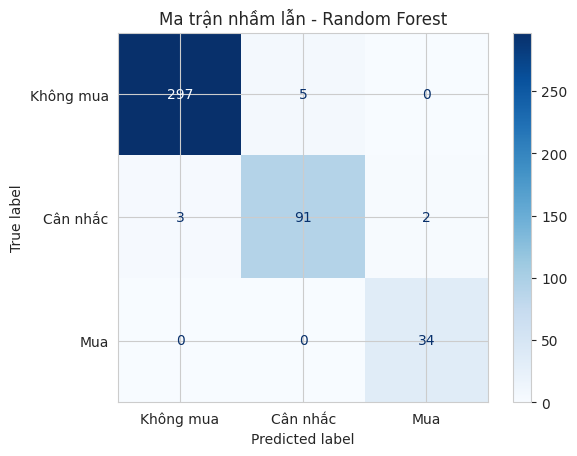

In [ ]:
# --- 1. VẼ CONFUSION MATRIX (MA TRẬN NHẦM LẪN) ---
# Xem chi tiết Random Forest (Mô hình tốt nhất) dự đoán sai ở đâu
plt.figure(figsize=(10, 5))
cm = confusion_matrix(y_test, y_pred_rf)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Không mua", "Cân nhắc", "Mua"])
disp.plot(cmap='Blues')
plt.title("Ma trận nhầm lẫn - Random Forest")
plt.show()

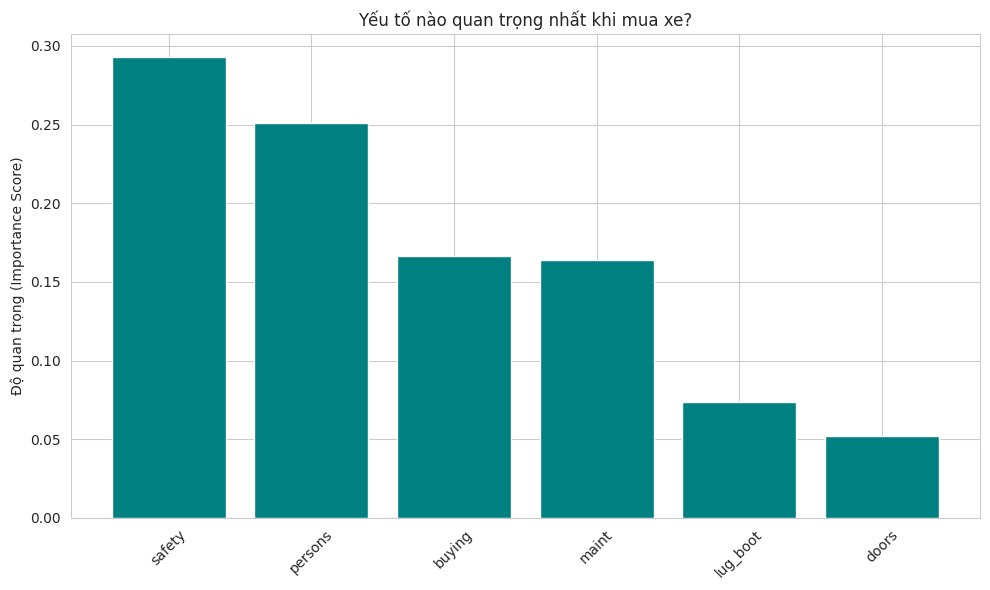

In [ ]:
# --- 2. VẼ FEATURE IMPORTANCE (YẾU TỐ QUAN TRỌNG NHẤT) ---
# Random Forest cho biết yếu tố nào ảnh hưởng nhất đến quyết định
importances = rf_model.feature_importances_
feature_names = X.columns
indices = np.argsort(importances)[::-1] # Sắp xếp giảm dần

plt.figure(figsize=(10, 6))
plt.title("Yếu tố nào quan trọng nhất khi mua xe?")
plt.bar(range(X.shape[1]), importances[indices], align="center", color='teal')
plt.xticks(range(X.shape[1]), feature_names[indices], rotation=45)
plt.ylabel("Độ quan trọng (Importance Score)")
plt.tight_layout()
plt.show()

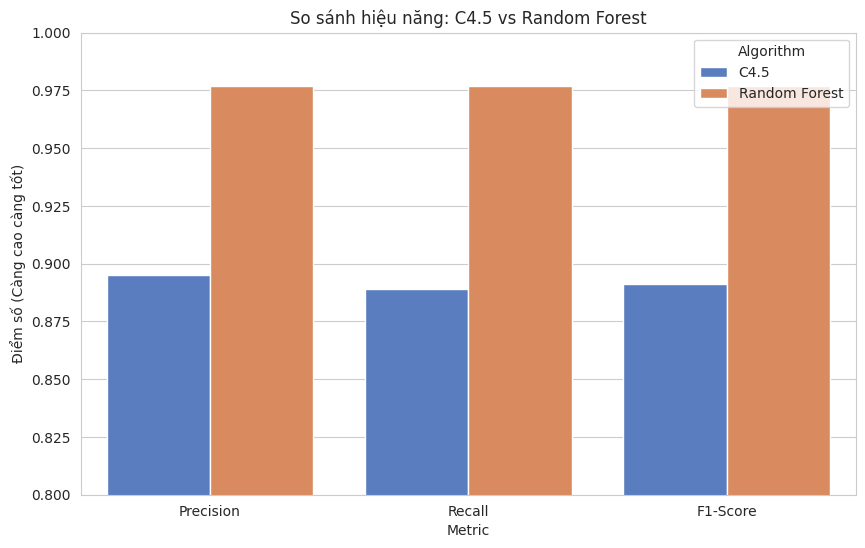

In [ ]:
def plot_comparison(model1_preds, model2_preds, y_true):
    from sklearn.metrics import precision_recall_fscore_support

    # Tính chỉ số cho C4.5
    p1, r1, f1, _ = precision_recall_fscore_support(y_true, model1_preds, average='weighted')

    # Tính chỉ số cho Random Forest
    p2, r2, f2, _ = precision_recall_fscore_support(y_true, model2_preds, average='weighted')

    # Tạo DataFrame để vẽ
    metrics_df = pd.DataFrame({
        'Metric': ['Precision', 'Precision', 'Recall', 'Recall', 'F1-Score', 'F1-Score'],
        'Score': [p1, p2, r1, r2, f1, f2],
        'Algorithm': ['C4.5', 'Random Forest', 'C4.5', 'Random Forest', 'C4.5', 'Random Forest']
    })

    plt.figure(figsize=(10, 6))
    sns.barplot(x='Metric', y='Score', hue='Algorithm', data=metrics_df, palette='muted')
    plt.ylim(0.8, 1.0) # Zoom vào khoảng 0.8 - 1.0 để thấy sự chênh lệch rõ hơn
    plt.title("So sánh hiệu năng: C4.5 vs Random Forest")
    plt.ylabel("Điểm số (Càng cao càng tốt)")
    plt.show()

plot_comparison(y_pred_c45, y_pred_rf, y_test)

In [ ]:
import joblib

# Lưu mô hình Random Forest (tốt nhất) ra file
joblib.dump(rf_model, 'car_model_rf.pkl')
print("Thành công!")

Thành công!
